In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
from glob import glob
import math
from pprint import pprint
import torch

import pygarment as pyg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

from tqdm import tqdm

import trimesh
from ANALYSIS.analysis_utils import (
    plot_panel_info,
    visualize_meshes_plotly,
    v_id_map
)

PROJECT_ROOT_PATH = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/"
GARMENT_ROOT_PATH = os.path.join(PROJECT_ROOT_PATH, "GarmentCodeData_v2")
BODY_ROOT_PATH = os.path.join(PROJECT_ROOT_PATH, "body_mesh")
MEAN_ALL_BODY_PATH = os.path.join(PROJECT_ROOT_PATH, "neutral_body/mean_all.obj")
    
default_body_mesh = trimesh.load(MEAN_ALL_BODY_PATH)

print("body vertices", default_body_mesh.vertices.shape)
print("body faces", default_body_mesh.faces.shape)

body vertices (23751, 3)
body faces (47500, 3)


In [2]:
# TODO: Garment Arc 없는 경우 처리
# json content root load
# 30427

import json
import random

json_file_path = "/media/hjp/db6095ca-a560-4c3a-90ad-b667ec189671/REFERENCES/3D_VTO/GarmentCode/GarmentCode/ANALYSIS_josef/garment_without_arc_list.json"

def load_json_file(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

json_data = load_json_file(json_file_path)
print(json_data[0])
len(json_data)

/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_14/default_body/rand_8SO8WAA1A6


30427

In [3]:
specific_name= os.path.basename(json_data[0])
spec_path = os.path.join(json_data[0],  f"{specific_name}_specification.json")

def load_josn_file(spec_path):
    with open(spec_path, 'r') as file:
        data = json.load(file)
    return data

data = load_josn_file(spec_path)
print(data['pattern']['panels']['left_ftorso']['translation'] ,data['pattern']['panels']['left_ftorso']['rotation'])


[0.0, 97.85775552378857, 30.0] [0.0, 0.0, 0.0]


In [11]:
a, b= drawn_pattern_list[0][0][0].start, drawn_pattern_list[0][0][0].end 
start_x, start_y = a.real, a.imag
end_x, end_y = b.real, b.imag
print(start_x, start_y, end_x, end_y)


26.082300000000004 22.23399173357106 26.082300000000004 1.6911380564175147


In [261]:
stitch_dict

{0: [{'panel': 'skirt_back', 'edge': 3}, {'panel': 'skirt_back', 'edge': 4}],
 1: [{'panel': 'skirt_back', 'edge': 6}, {'panel': 'skirt_back', 'edge': 7}],
 2: [{'panel': 'skirt_back', 'edge': 9}, {'panel': 'skirt_back', 'edge': 10}],
 3: [{'panel': 'skirt_back', 'edge': 12}, {'panel': 'skirt_back', 'edge': 13}],
 4: [{'panel': 'skirt_front', 'edge': 6}, {'panel': 'skirt_back', 'edge': 0}],
 5: [{'panel': 'skirt_front', 'edge': 5}, {'panel': 'skirt_back', 'edge': 1}],
 6: [{'panel': 'skirt_front', 'edge': 3}, {'panel': 'skirt_back', 'edge': 15}],
 7: [{'panel': 'skirt_front', 'edge': 2}, {'panel': 'skirt_back', 'edge': 16}]}

In [4]:
import random
# 30427

IDX = random.randint(0, 30428)
# BODY_TYPE = "random_body"
BODY_TYPE = "default_body"

# garment_path_list = sorted(list(filter(
#     os.path.isdir,
#     glob(os.path.join(GARMENT_ROOT_PATH, "*", BODY_TYPE, "*"))
# )))
garment_path = json_data[IDX]
# garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_0/default_body/rand_0BD28UCVO8"
# garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_0/default_body/rand_0AAY3NQH8J"
# garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_3/default_body/rand_005ZYVMOCL"
# garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_0/default_body/rand_0A36YXPNV0"
garment_id = os.path.basename(garment_path)

SPEC_FILE_PATH = os.path.join(garment_path, f"{garment_id}_specification.json")

pattern = pyg.pattern.wrappers.VisPattern(SPEC_FILE_PATH)

drawn_pattern_list = list(map(
    lambda pannel_name : pattern._draw_a_panel(
        pannel_name, apply_transform=False, fill=True
    ),
    pattern.panel_order()
))
# drawn_pattern_list[4]

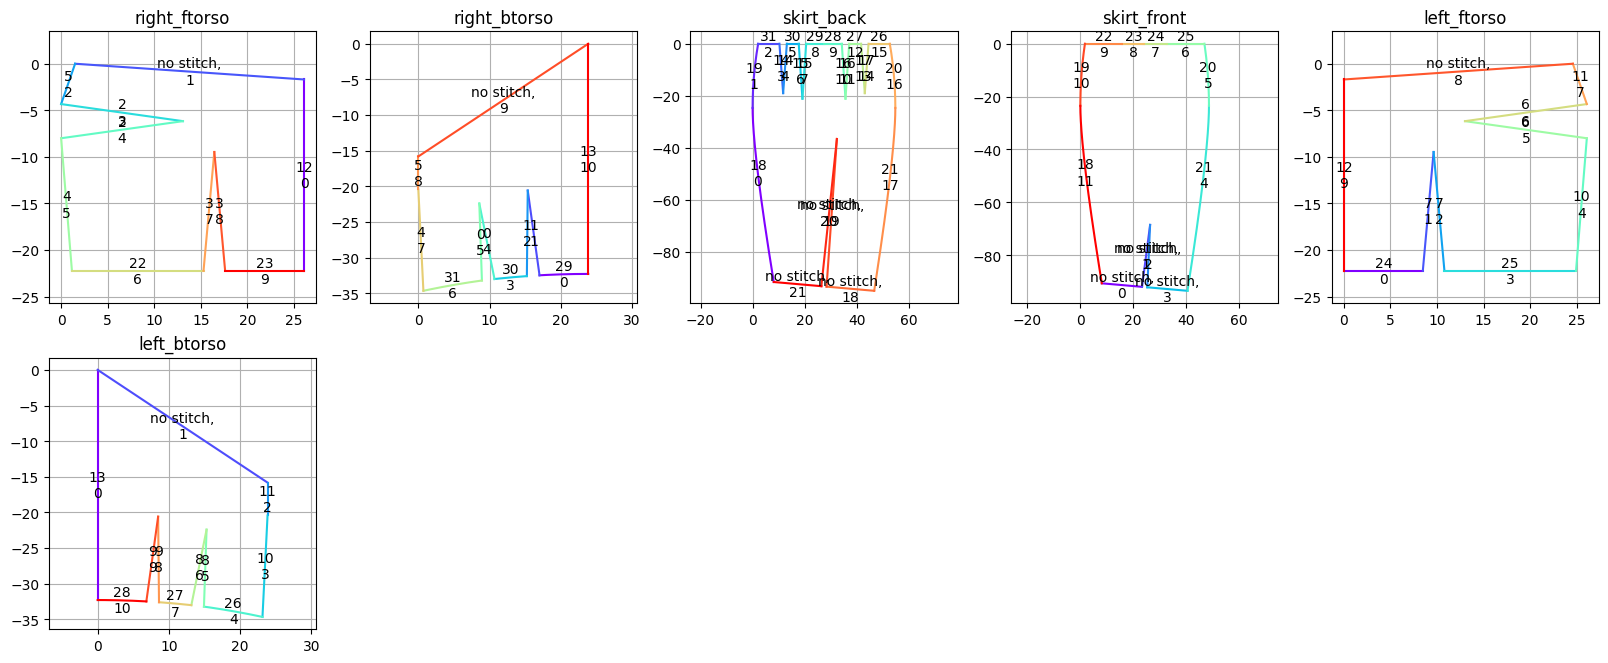

In [5]:
panel_svg_path_dict = {
    panel_name : pattern._draw_a_panel(
        panel_name, apply_transform=False, fill=True
    )
    for panel_name in pattern.panel_order()
}

stitch_dict = {
    i : v for i, v in enumerate(pattern.pattern['stitches'])
}

FIGLEN = 4
NCOLS = int(np.sqrt(len(panel_svg_path_dict)))
NROWS = int(np.ceil(len(panel_svg_path_dict) / NCOLS))
NCOLS = 5
NROWS = 3

plt.figure(figsize=(FIGLEN * NCOLS, FIGLEN * NROWS))
for i, (panel_name, panel) in enumerate(panel_svg_path_dict.items()):
    ax = plt.subplot(NROWS, NCOLS, i + 1)
    ax.set_title(panel_name)
    plot_panel_info(
        ax, panel_name, panel_svg_path_dict, stitch_dict,
        N_SAMPLES=1000
    )
# plt.savefig(f"{garment_id}_panel_vis.png")
plt.show()

In [100]:
panel_svg_path_dict['right_btorso']

(Path(QuadraticBezier(start=(23.83805+32.2925861645143j), control=(20.41580365836496+32.29258613269977j), end=(17.003876502111655+32.48582257039246j)),
      Line(start=(17.003876502111655+32.48582257039246j), end=(15.351116538478411+20.596101433838065j)),
      Line(start=(15.351116538478411+20.596101433838065j), end=(15.22828367162682+32.59951745967164j)),
      QuadraticBezier(start=(15.22828367162682+32.59951745967164j), control=(12.956118484883692+32.76182822650773j), end=(10.688536931043377+33.0099718371841j)),
      Line(start=(10.688536931043377+33.0099718371841j), end=(8.555268374597688+22.41904159144846j)),
      Line(start=(8.555268374597688+22.41904159144846j), end=(8.92133247524254+33.21647810564835j)),
      QuadraticBezier(start=(8.92133247524254+33.21647810564835j), control=(4.806184540271747+33.78507190149989j), end=(0.7116916666666668+34.66147782685373j)),
      Line(start=(0.7116916666666668+34.66147782685373j), end=20.427611160187062j),
      Line(start=20.427611160

In [43]:
panel_svg_path_dict

{'right_btorso': (Path(QuadraticBezier(start=(23.83805+32.2925861645143j), control=(20.41580365836496+32.29258613269977j), end=(17.003876502111655+32.48582257039246j)),
       Line(start=(17.003876502111655+32.48582257039246j), end=(15.351116538478411+20.596101433838065j)),
       Line(start=(15.351116538478411+20.596101433838065j), end=(15.22828367162682+32.59951745967164j)),
       QuadraticBezier(start=(15.22828367162682+32.59951745967164j), control=(12.956118484883692+32.76182822650773j), end=(10.688536931043377+33.0099718371841j)),
       Line(start=(10.688536931043377+33.0099718371841j), end=(8.555268374597688+22.41904159144846j)),
       Line(start=(8.555268374597688+22.41904159144846j), end=(8.92133247524254+33.21647810564835j)),
       QuadraticBezier(start=(8.92133247524254+33.21647810564835j), control=(4.806184540271747+33.78507190149989j), end=(0.7116916666666668+34.66147782685373j)),
       Line(start=(0.7116916666666668+34.66147782685373j), end=20.427611160187062j),
     

In [6]:
for k, v in stitch_dict.items():
    panels = [v[0]['panel'], v[1]['panel']]
    if "left_ftorso" in panels and "right_ftorso" in panels:
        print(k)

20


In [243]:

box_mesh = trimesh.load_mesh(
    os.path.join(garment_path, f"{garment_id}_boxmesh.ply"),
    process=False
)
box_mesh.vertices = box_mesh.vertices / 100


tex_image = Image.open(os.path.join(garment_path, f"{garment_id}_texture.png"))
texture = trimesh.visual.TextureVisuals(
    box_mesh.visual.uv,
    image=tex_image
)
box_mesh.visual = texture

print("vertices", box_mesh.vertices.shape)
print("faces", box_mesh.faces.shape)

idx_convert_map = np.array(v_id_map(box_mesh.vertices))

# visualize_meshes_plotly(
#     [
#         box_mesh,
#         default_body_mesh
#     ],
#     color_list=["red", "blue"],
#     # vertex_list=simulated_garment_mesh.vertices[stitch_vertex_mask_dict[0]]
#     # vertex_list=simulated_garment_mesh.vertices[panel_vertex_mask_dict["left_ftorso"]]
#     vertices_list=[box_mesh.vertices],
#     vertices_color_list = ["black"]
# )

vertices (5486, 3)
faces (10437, 3)


In [244]:
QUERY_VERTEX_IDX = idx_convert_map.max()
QUERY_VERTEX_IDX = 5
same_vertex_idx_list = []

filtered_vertex_idx = idx_convert_map[QUERY_VERTEX_IDX]

same_vertex_idx_list = np.where(
    np.array(idx_convert_map) == filtered_vertex_idx
)[0]
print("QUERY_VERTEX_IDX    ", QUERY_VERTEX_IDX)
print("filtered_vertex_idx ", filtered_vertex_idx)
print("same_vertex_idx_list", same_vertex_idx_list)

print(idx_convert_map[same_vertex_idx_list])
print(idx_convert_map[QUERY_VERTEX_IDX])
print(idx_convert_map[:QUERY_VERTEX_IDX + 1])

QUERY_VERTEX_IDX     5
filtered_vertex_idx  3
same_vertex_idx_list [5 6]
[3 3]
3
[0 1 1 2 2 3]


## Processing
- Some vertices (Stitch Vertices) are duplicated.
- I have to Reorder Seam Vertices Path 

## Make Filtered Mesh

In [12]:
fltrd_vis_seam_line_dict = {}
fltrd_stch_vert_edge_connect_dict = {}
for fltrd_stch_idx in filtered_stitch_vertex_mask_dict.keys():
    fltrd_stch_vert_map = filtered_stitch_vertex_mask_dict[fltrd_stch_idx]
    fltrd_stch_vert_idx_arr = np.where(fltrd_stch_vert_map)[0]
    
    adj_dict = {}
    for v1, v2 in filtered_edges:
        if v1 in fltrd_stch_vert_idx_arr and v2 in fltrd_stch_vert_idx_arr:
            if v1 not in adj_dict: adj_dict[v1] = set()
            if v2 not in adj_dict: adj_dict[v2] = set()
            adj_dict[v1].add(v2)
            adj_dict[v2].add(v1)
    
    endpoints = [
        v for v in fltrd_stch_vert_idx_arr if len(adj_dict.get(v, set())) == 1
    ]
    if len(endpoints) != 2:
        print(f"Warning: Found {len(endpoints)} endpoints, expected 2. Path may not be linear.")
        continue
    
    seam_vert_idx_list = [endpoints[0]]
    while len(seam_vert_idx_list) < len(fltrd_stch_vert_idx_arr):
        current_vert = seam_vert_idx_list[-1]
        neighbors = adj_dict[current_vert]
        next_vert = next((v for v in neighbors if v not in seam_vert_idx_list), None)
        if next_vert is None:
            break
        seam_vert_idx_list.append(next_vert)
    fltrd_vis_seam_line_dict[fltrd_stch_idx] = seam_vert_idx_list
    
    edge_connect_list = []
    for stt, end in zip(seam_vert_idx_list[:-1], seam_vert_idx_list[1:]):
        edge_exist = np.any(
            np.logical_or(
                np.logical_and(
                    filtered_edges[:, 0] == stt,
                    filtered_edges[:, 1] == end
                ),
                np.logical_and(
                    filtered_edges[:, 0] == end,
                    filtered_edges[:, 1] == stt
                )
            )
        )
            
        if edge_exist == False:
            print(f"Missing edge between vertices {stt} and {end}")

        edge_connect_list.append(edge_exist)

    fltrd_stch_vert_edge_connect_dict[fltrd_stch_idx] = edge_connect_list

In [13]:
SPEC_FILE_PATH

'/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_26/default_body/rand_O0NWZUBVWG/rand_O0NWZUBVWG_specification.json'

In [32]:
panel_fstart_fend_info['right_btorso'][0]


{'edge_id': 0,
 'edge': 'QuadraticBezier(start=(23.83805+32.2925861645143j), control=(20.41580365836496+32.29258613269977j), end=(17.003876502111655+32.48582257039246j))',
 'fstart': 0.0,
 'fend': np.float64(0.047108)}

In [230]:
import pandas as pd
file_path = '/media/hjp/db6095ca-a560-4c3a-90ad-b667ec189671/REFERENCES/3D_VTO/GarmentCode/GarmentCode/ANALYSIS_josef/nique_panel_names.csv'
data = pd.read_csv(file_path)

# 열 이름 설정
data.columns = ['name']

# 분류 로직 추가
data['classification'] = data['name'].apply(
    lambda x: 'back' if '_back' in x or '_b' in x else
              'front' if '_front' in x or '_f' in x else
              'other'
)

# 각 분류에 따른 리스트 생성
front_list = data[data['classification'] == 'front']['name'].tolist()
back_list = data[data['classification'] == 'back']['name'].tolist()
other_list = data[data['classification'] == 'other']['name'].tolist()
print(front_list)
print(back_list)
print(other_list) 

['ins_skirt_front_1', 'skirt_front_4', 'pant_f_l', 'sl_right_cuff_f', 'left_collar_front', 'skirt_front_1', 'left_sleeve_f', 'ins_skirt_front_4', 'ins_skirt_front_5', 'right_collar_front', 'wb_front', 'ins_skirt_front_0', 'skirt_front_2', 'skirt_front', 'sl_left_cuff_f', 'pant_l_cuff_f', 'skirt_front_3', 'pant_l_cuff_skirt_f', 'right_sleeve_f', 'pant_r_cuff_f', 'pant_f_r', 'pant_r_cuff_skirt_f', 'left_ftorso', 'right_ftorso', 'skirt_front_0', 'ins_skirt_front_3', 'sl_right_cuff_skirt_f', 'sl_left_cuff_skirt_f', 'ins_skirt_front_2']
['pant_l_cuff_b', 'pant_r_cuff_b', 'ins_skirt_back_3', 'left_btorso', 'skirt_back_1', 'ins_skirt_back_1', 'right_sleeve_b', 'ins_skirt_back_0', 'pant_r_cuff_skirt_b', 'sl_right_cuff_b', 'left_collar_back', 'right_collar_back', 'ins_skirt_back_5', 'sl_right_cuff_skirt_b', 'sl_left_cuff_skirt_b', 'right_btorso', 'ins_skirt_back_4', 'pant_b_r', 'skirt_back_3', 'left_sleeve_b', 'skirt_back_4', 'pant_l_cuff_skirt_b', 'skirt_back_0', 'skirt_back', 'ins_skirt_back_

In [30]:
stitch_dict[0]

[{'panel': 'skirt_front_0', 'edge': 3}, {'panel': 'skirt_back_0', 'edge': 0}]

변환된 3D 좌표:
[[-13.1197528  -15.0477905   25.        ]
 [ -4.37355573 -10.1996943   25.        ]
 [-17.967849    -6.30159343  25.        ]
 [ -9.22165193  -1.45349723  25.        ]]


In [56]:
type(panel_svg_path_dict['left_btorso'][0])

svgpathtools.path.Path

In [52]:
# i want extract start and end point of the edge

#panel_fstart_fend_info['left_btorso']

# format에 맞게끔 

In [56]:
first_fstart_fend = next(
        (item for item in panel_fstart_fend_info[first_panel] if item["edge_id"] == first_edge),
        None
    )

In [60]:
panel_fstart_fend_info[first_panel]

'QuadraticBezier(start=(8.92133247524254+33.21647810564835j), control=(4.806184540271747+33.78507190149989j), end=(0.7116916666666668+34.66147782685373j))'

In [26]:
# extract json specification "rotation":, "translation" info
# SPEC_FILE_PATH

import json

# JSON 파일 경로
info_file_path = SPEC_FILE_PATH

# JSON 파일 읽기
with open(info_file_path, "r") as file:
    data = json.load(file)

# translation과 rotation 정보 추출
translations_and_rotations = {}
panels = data.get("pattern", {}).get("panels", {})  # 패널 정보 가져오기

for panel_name, panel_info in panels.items():
    translation = panel_info.get("translation", None)
    rotation = panel_info.get("rotation", None)
    translations_and_rotations[panel_name] = {
        "translation": translation,
        "rotation": rotation
    }

# translations_and_rotations 정보 
print(translations_and_rotationsb)

NameError: name 'translations_and_rotationsb' is not defined

In [27]:
translations_and_rotations

{'right_btorso': {'translation': [0.0, 103.895647186128, -25.0],
  'rotation': [0.0, 0.0, 0.0]},
 'right_ftorso': {'translation': [0.0, 97.85775552378857, 30.0],
  'rotation': [0.0, 0.0, 0.0]},
 'left_ftorso': {'translation': [0.0, 97.85775552378857, 30.0],
  'rotation': [0.0, 0.0, 0.0]},
 'left_btorso': {'translation': [0.0, 103.895647186128, -25.0],
  'rotation': [0.0, 0.0, 0.0]},
 'skirt_front': {'translation': [-16.292673144577012, 5.170439352560706, 25.0],
  'rotation': [0.0, 0.0, 0.0]},
 'skirt_back': {'translation': [-19.292673144577012, 4.440315632939118, -20.0],
  'rotation': [0.0, 0.0, 0.0]}}

In [126]:
# first_panel -> panel이름
#first_panel
translations_and_rotations[first_panel]['translation']
translations_and_rotations[first_panel]['rotation']


[0.0, 103.895647186128, -25.0]
[0.0, 0.0, 0.0]


In [126]:
import random
import os
# 30427

IDX = random.randint(0, 30428)
# BODY_TYPE = "random_body"
BODY_TYPE = "default_body"

# garment_path_list = sorted(list(filter(
#     os.path.isdir,
#     glob(os.path.join(GARMENT_ROOT_PATH, "*", BODY_TYPE, "*"))
# )))

# garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_0/default_body/rand_0BD28UCVO8"
# garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_0/default_body/rand_0AAY3NQH8J"
# garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_3/default_body/rand_005ZYVMOCL"
# garment_path = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_0/default_body/rand_0A36YXPNV0"

#garment_path = json_data[IDX]
#garment_id = os.path.basename(garment_path)

#SPEC_FILE_PATH = os.path.join(garment_path, f"{garment_id}_specification.json")
SPEC_FILE_PATH = "/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_30/default_body/rand_2W0IYY409L/rand_2W0IYY409L_specification.json"
pattern = pyg.pattern.wrappers.VisPattern(SPEC_FILE_PATH)

drawn_pattern_list = list(map(
    lambda pannel_name : pattern._draw_a_panel(
        pannel_name, apply_transform=False, fill=True
    ),
    pattern.panel_order()
))

# drawn_pattern_list[4]
######################

In [127]:
print(SPEC_FILE_PATH)

/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_30/default_body/rand_2W0IYY409L/rand_2W0IYY409L_specification.json


In [128]:
os.path.basename(SPEC_FILE_PATH)

'rand_2W0IYY409L_specification.json'

In [174]:
panel_svg_path_dict['right_btorso'][0]

Path(QuadraticBezier(start=(23.83805+37.46770633371429j), control=(20.41580365836496+37.46770630189976j), end=(17.003876502111655+37.66094273959245j)),
     Line(start=(17.003876502111655+37.66094273959245j), end=(15.351116538478411+25.771221603038057j)),
     Line(start=(15.351116538478411+25.771221603038057j), end=(15.22828367162682+37.77463762887163j)),
     QuadraticBezier(start=(15.22828367162682+37.77463762887163j), control=(12.956118484883692+37.936948395707724j), end=(10.688536931043377+38.185092006384096j)),
     Line(start=(10.688536931043377+38.185092006384096j), end=(8.555268374597688+27.594161760648454j)),
     Line(start=(8.555268374597688+27.594161760648454j), end=(8.92133247524254+38.39159827484834j)),
     QuadraticBezier(start=(8.92133247524254+38.39159827484834j), control=(4.806184540271747+38.96019207069988j), end=(0.7116916666666668+39.83659799605372j)),
     Line(start=(0.7116916666666668+39.83659799605372j), end=25.602731329387055j),
     Line(start=25.6027313293

In [171]:
import math
from svgpathtools import Path, Line, QuadraticBezier, CubicBezier, Arc

def calculate_edge_length(edge):
    """
    각 엣지의 길이를 계산. QuadraticBezier의 경우 CubicBezier처럼 처리.
    """
    if isinstance(edge, Line):
        return abs(edge.end - edge.start)
    elif isinstance(edge, QuadraticBezier):
        # QuadraticBezier -> CubicBezier 변환
        # 기존 컨트롤 포인트
        control1 = edge.control
        
        # 새로운 컨트롤 포인트 추가
        control2 = complex(round(control1.real, 4), control1.imag)  # x좌표 소수점 4자리로 변경
        print("control1", control1)
        print("control2", control2)
        # QuadraticBezier -> CubicBezier 변환
        cubic_edge = CubicBezier(
            start=edge.start,
            control1=control1,
            control2=control2,
            end=edge.end
        )
        
        # CubicBezier 길이 계산
        return cubic_edge.length()
    elif isinstance(edge, CubicBezier):
        return edge.length()
    elif isinstance(edge, Arc):
        return edge.length()
    else:
        raise ValueError(f"Unsupported edge type: {type(edge)}")

In [173]:
calculate_edge_length(panel_svg_path_dict['right_sleeve_f'][0][0])

37.26990014131893

In [170]:
calculate_edge_length(panel_svg_path_dict['right_sleeve_f'][0][2])

28.154586348381823

In [151]:
print(panel_svg_path_dict['right_sleeve_f'])
print(panel_svg_path_dict['right_ftorso'])


(Path(Line(start=0j, end=37.26990014131893j),
     Line(start=37.26990014131893j, end=(5+25.280312955448025j)),
     CubicBezier(start=(5+25.280312955448025j), control1=(8.501269067647055+16.673933137748588j), control2=(16.145273970999042+13.099729351316812j), end=(16.15454656416798+0j)),
     Line(start=(16.15454656416798+0j), end=0j)), {'fill': 'rgb(227,175,186)', 'stroke': 'rgb(51,51,51)', 'stroke-width': '0.2'}, True)
(Path(Line(start=(26.082300000000004+43.50559780721201j), end=(26.082300000000004+12.008271235010739j)),
     QuadraticBezier(start=(26.082300000000004+12.008271235010739j), control=(9.142273112839797+12.0415195547301j), end=(15.263500000000004+0j)),
     Line(start=(15.263500000000004+0j), end=(9.01370668014938+2.4842772689268173j)),
     CubicBezier(start=(9.01370668014938+2.4842772689268173j), control1=(9.005754952441873+13.183516360009822j), control2=(9.554228315817365+19.824834678322077j), end=(1.6212112247343633+20.92575726892682j)),
     Line(start=(1.621211224

In [164]:
panel_svg_path_dict['right_sleeve_f'][0][2]

CubicBezier(start=(5+25.280312955448025j), control1=(8.501269067647055+16.673933137748588j), control2=(16.145273970999042+13.099729351316812j), end=(16.15454656416798+0j))

In [162]:
for idx, a in enumerate(panel_svg_path_dict['right_sleeve_f'][0]):
    print(a.start.real, a.start.imag)
    print(a.end.real, a.end.imag)

0.0 0.0
0.0 37.26990014131893
0.0 37.26990014131893
5.0 25.280312955448025
5.0 25.280312955448025
16.15454656416798 0.0
16.15454656416798 0.0
0.0 0.0


In [161]:
import math
from svgpathtools import Path, Line, QuadraticBezier, CubicBezier, Arc

def calculate_edge_length(edge):
    """
    각 엣지의 길이를 계산.
    """
    if isinstance(edge, Line):
        return abs(edge.end - edge.start)
    elif isinstance(edge, QuadraticBezier):
        return edge.length()
    elif isinstance(edge, CubicBezier):
        return edge.length()
    elif isinstance(edge, Arc):
        return edge.length()
    else:
        raise ValueError(f"Unsupported edge type: {type(edge)}")

def calculate_fstart_fend(path):
    """
    전체 엣지에 대해 fstart와 fend를 계산.
    """
    total_length = sum(calculate_edge_length(edge) for edge in path)
    fstart = 0.0
    results = []

    for idx, edge in enumerate(path):  # enumerate를 사용하여 번호 부여
        edge_length = calculate_edge_length(edge)
        fend = fstart + (edge_length / total_length)
        results.append({
            "edge_id": idx,  # 엣지 번호
            "edge": str(edge),  # Edge를 문자열로 변환하여 저장
            "fstart": round(fstart, 6),
            "fend": round(fend, 6)
        })
        fstart = fend

    return results

In [20]:
# NO ARC 패널 이름과 경로 매핑 (didn't duplicate)
import os
import json
import tqdm
import pandas as pd

NO_ARC_PATH = "/media/hjp/db6095ca-a560-4c3a-90ad-b667ec189671/REFERENCES/3D_VTO/GarmentCode/GarmentCode/ANALYSIS_josef/garment_without_arc_list.json"

with open(NO_ARC_PATH, "r") as f:
    json_data = json.load(f)

# Dictionary to store panel names and their corresponding paths
panel_path_dict = {}

for IDX in tqdm.tqdm(range(len(json_data))):
    garment_id = os.path.basename(json_data[IDX])
    garment_path = os.path.join(json_data[IDX], f"{garment_id}_specification.json")

    with open(garment_path, "r") as f:
        garment_data = json.load(f)
        for panel_name in garment_data['pattern']['panels']:
            # If the panel name is new, add it to the dictionary with its path
            if panel_name not in panel_path_dict:
                panel_path_dict[panel_name] = garment_path

# Create a DataFrame from the dictionary
df = pd.DataFrame(list(panel_path_dict.items()), columns=['Panel Name', 'Path'])

# Save the DataFrame to a CSV file
csv_file_path = './Unique_No_Arc_Panel_List_Key_Value.csv'
df.to_csv(csv_file_path, index=False)

100%|██████████| 30427/30427 [00:03<00:00, 7779.86it/s]


In [192]:
garment_data['pattern']['panels']

{'left_ftorso': {'translation': [0.0, 97.85775552378857, 30.0],
  'rotation': [0.0, 0.0, 0.0],
  'vertices': [[0.0, 0.0],
   [8.473150131373654, 0.0],
   [9.634250131373655, 12.757752334184888],
   [10.795350131373658, 2.8438747969799893e-16],
   [24.921200000000002, 0.0],
   [26.082300000000004, 14.233866642059992],
   [13.003468750843743, 16.06836664205999],
   [26.082300000000004, 17.90286664205999],
   [24.58097269523279, 22.23399173357106],
   [0.0, 22.96642183941948]],
  'edges': [{'endpoints': [0, 1]},
   {'endpoints': [1, 2]},
   {'endpoints': [2, 3]},
   {'endpoints': [3, 4]},
   {'endpoints': [4, 5]},
   {'endpoints': [5, 6]},
   {'endpoints': [6, 7]},
   {'endpoints': [7, 8]},
   {'endpoints': [8, 9], 'label': 'strapless_top'},
   {'endpoints': [9, 0]}],
  'label': 'body'},
 'left_btorso': {'translation': [0.0, 103.895647186128, -25.0],
  'rotation': [0.0, 0.0, 0.0],
  'vertices': [[0.0, 0.36889166233942916],
   [0.0, 31.36011167273039],
   [23.83805, 16.84731755744944],
   

In [191]:
garment_panel_list

['skirt_front_0',
 'skirt_back_0',
 'skirt_back',
 'skirt_front',
 'left_ftorso',
 'left_btorso',
 'right_btorso',
 'right_ftorso',
 'skirt_back',
 'skirt_front',
 'wb_front',
 'wb_back',
 'pant_f_r',
 'pant_b_r',
 'pant_b_l',
 'pant_f_l',
 'wb_back',
 'wb_front',
 'pant_f_l',
 'pant_b_l',
 'pant_l_cuff_skirt_b',
 'pant_l_cuff_skirt_f',
 'pant_b_r',
 'pant_r_cuff_skirt_b',
 'pant_r_cuff_skirt_f',
 'pant_f_r',
 'wb_back',
 'wb_front',
 'right_ftorso',
 'right_btorso',
 'left_ftorso',
 'left_btorso',
 'wb_front',
 'wb_back',
 'pant_b_r',
 'pant_f_r',
 'pant_b_l',
 'pant_f_l',
 'skirt_front',
 'skirt_back',
 'wb_front',
 'wb_back',
 'pant_l_cuff_b',
 'pant_l_cuff_f',
 'pant_b_l',
 'pant_f_l',
 'pant_r_cuff_b',
 'pant_r_cuff_f',
 'pant_f_r',
 'pant_b_r',
 'wb_back',
 'wb_front',
 'pant_b_r',
 'pant_f_r',
 'pant_f_l',
 'pant_b_l',
 'skirt_front',
 'skirt_back',
 'pant_b_l',
 'pant_f_l',
 'pant_b_r',
 'pant_f_r',
 'right_btorso',
 'right_ftorso',
 'left_btorso',
 'left_ftorso',
 'left_btorso

ValueError: num must be an integer with 1 <= num <= 15, not 16

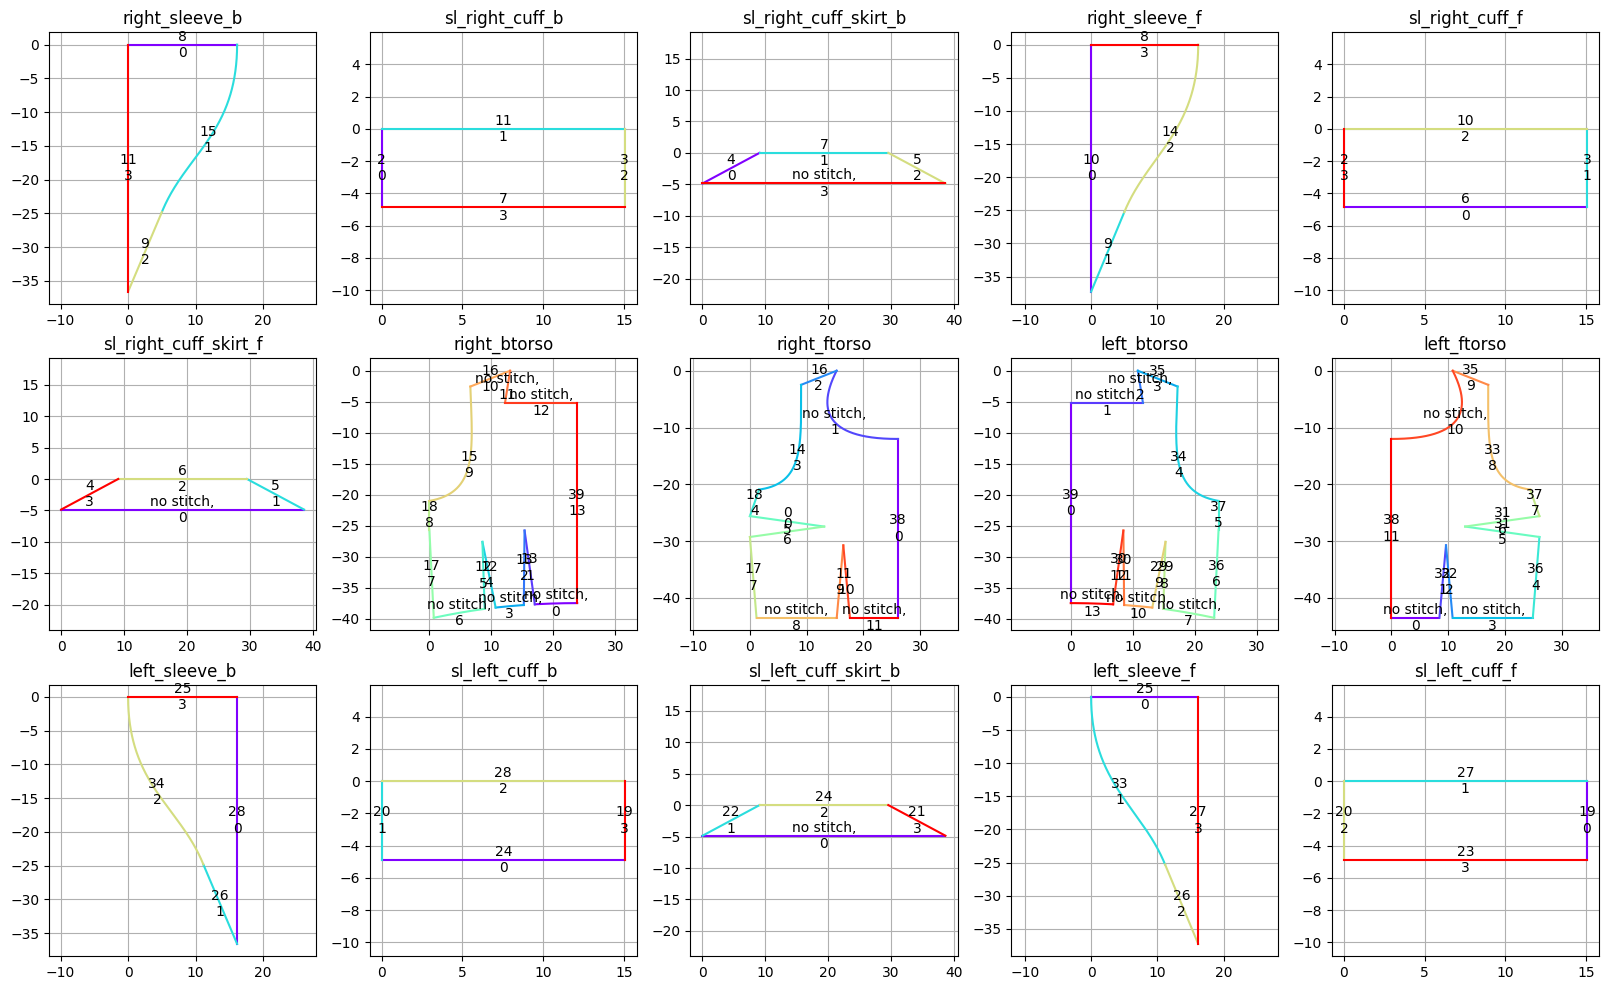

In [130]:
panel_svg_path_dict = {
    panel_name : pattern._draw_a_panel(
        panel_name, apply_transform=False, fill=True
    )
    for panel_name in pattern.panel_order()
}

stitch_dict = {
    i : v for i, v in enumerate(pattern.pattern['stitches'])
}

FIGLEN = 4
NCOLS = int(np.sqrt(len(panel_svg_path_dict)))
NROWS = int(np.ceil(len(panel_svg_path_dict) / NCOLS))
NCOLS = 5
NROWS = 3

plt.figure(figsize=(FIGLEN * NCOLS, FIGLEN * NROWS))
for i, (panel_name, panel) in enumerate(panel_svg_path_dict.items()):
    ax = plt.subplot(NROWS, NCOLS, i+1) # i+1
    ax.set_title(panel_name)
    plot_panel_info(
        ax, panel_name, panel_svg_path_dict, stitch_dict,
        N_SAMPLES=1000
    )
# plt.savefig(f"{garment_id}_panel_vis.png")
plt.show()

In [139]:
# TODO:아래에 해당하는 arc_to_bezier는 개구려서 새로 만든거임
import numpy as np
import re

def arc_to_single_control_bezier(arc):
    """
    Arc 데이터를 단일 Control Point를 가진 Bezier Curve로 변환합니다.
    
    Args:
        arc (dict): Arc 데이터 (start_x, start_y, end_x, end_y, radius, large_arc, sweep 포함).
    
    Returns:
        dict: Bezier Curve의 시작점, 끝점, 제어점 1개.
    """
    
    # 시작점과 끝점 정의
    start_x, start_y = arc["start_x"], arc["start_y"]
    end_x, end_y = arc["end_x"], arc["end_y"]
    radius = arc["radius"]  # 반지름
    large_arc = arc["large_arc"]
    sweep = arc["sweep"]

    # 시작점과 끝점을 복소수로 변환
    start = np.array([start_x, start_y])
    end = np.array([end_x, end_y])

    # 중심 계산
    center = (start + end) / 2
    cx, cy = center[0], center[1]

    # 각도 계산
    theta_start = np.arctan2(start_y - cy, start_x - cx)
    theta_end = np.arctan2(end_y - cy, end_x - cx)

    # sweep 및 large_arc 처리
    if not sweep:
        theta_start, theta_end = theta_end, theta_start
    if large_arc and abs(theta_end - theta_start) < np.pi:
        theta_end += 2 * np.pi

    # 중간 각도 계산
    theta_m = (theta_start + theta_end) / 2  # 중간 각도

    # Control Point 계산 (중간 각도 기준)
    control_x = cx + radius * np.cos(theta_m)
    control_y = cy + radius * np.sin(theta_m)
    control_point = np.array([control_x, control_y])

    # Control Point를 직선(start-end) 기준으로 대칭 변환
    def reflect_point_over_line(p, p0, p1):
        # 직선 벡터
        line_vec = p1 - p0
        line_vec /= np.linalg.norm(line_vec)  # 정규화
        # 점과 직선의 수직 대칭 계산
        proj = np.dot(p - p0, line_vec) * line_vec
        reflection = 2 * proj - (p - p0)
        return p0 + reflection

    # Control Point 대칭
    control_reflected = reflect_point_over_line(control_point, start, end)

    # 반환 형식
    return {
        "start_x": start_x, "start_y": start_y,
        "control1_x": control_reflected[0], "control1_y": control_reflected[1],
        "control2_x": control_reflected[0].round(4), "control2_y": control_reflected[1],
        "end_x": end_x, "end_y": end_y,
    }

def transform_3d_point(fstart_fend):
    start_3d_point = None  # 기본값 설정
    end_3d_point = None
    panel_name = fstart_fend["panel"]
    edge_str= fstart_fend["edge"]
    pattern = r'start=([^\s,]+).*end=([^\s,]+)'
    match = re.search(pattern, edge_str)
    print("match", match)
    if match:
        start_str = match.group(1)  # "8.92133247524254+33.21647810564835j"
        end_str   = match.group(2)  # "0.7116916666666668+34.66147782685373j"
        print(f"{start_str}, {end_str}, start_str, end_str")
        
        
        # 불필요한 문자 제거
        start_str = start_str.strip("(")
        end_str = end_str.strip("(")
        start_str = start_str.strip(")")
        end_str = end_str.strip(")")
        print("start_str:", start_str, "end_str:", end_str)

        # 문자열 -> 복소수 변환
        start_complex = complex(start_str)  # (8.92133247524254+33.21647810564835j)
        end_complex   = complex(end_str)    # (0.7116916666666668+34.66147782685373j)

        # 실수부, 허수부 분리
        start_point = (start_complex.real, start_complex.imag) # start_y
        end_point = (end_complex.real, end_complex.imag) # end_y
        print(start_point, end_point)
        print("start_point type11", type(start_point))
        #TODO: 2024.01.20
        print(panel_name)
        translation = translations_and_rotations[panel_name]['translation']
        rotation = translations_and_rotations[panel_name]['rotation']
        print("translation", translation)
        print("rotation", rotation)
        
        
        
        start_3d_point = transform_2d_points_to_3d(start_point, translation, rotation)
        end_3d_point = transform_2d_points_to_3d(end_point, translation, rotation)
        
        return start_3d_point, end_3d_point
 
 ##############
# TODO: make panel direction 그냥 둠 2024.01.20 make_json.ipynb 파일 참고
##################################

# 3차원으로 변환
import numpy as np

def euler_to_rotation_matrix(rx_deg, ry_deg, rz_deg):
    """
    Rx, Ry, Rz (degree) 오일러 각을 받아서
    X축 -> Y축 -> Z축 순서로 회전하는 3x3 회전 행렬을 반환.
    """
    # 각도를 radian으로 변환
    rx = np.deg2rad(rx_deg)
    ry = np.deg2rad(ry_deg)
    rz = np.deg2rad(rz_deg)

    # 회전 행렬 구성

    # 1) X축 회전 행렬
    Rx = np.array([
        [1,          0,           0],
        [0,  np.cos(rx), -np.sin(rx)],
        [0,  np.sin(rx),  np.cos(rx)]
    ])

    # 2) Y축 회전 행렬
    Ry = np.array([
        [ np.cos(ry), 0, np.sin(ry)],
        [          0, 1,          0],
        [-np.sin(ry), 0, np.cos(ry)]
    ])

    # 3) Z축 회전 행렬
    Rz = np.array([
        [np.cos(rz), -np.sin(rz), 0],
        [np.sin(rz),  np.cos(rz), 0],
        [         0,           0, 1]
    ])

    # 순서: X축 회전 -> Y축 회전 -> Z축 회전 (Intrinsic)
    # 최종 회전 행렬 = Rz * Ry * Rx (행렬 곱 순서 유의)
    R = Rz @ Ry @ Rx

    return R

def transform_2d_points_to_3d(points_2d, translation, rotation):
    """
    2D 좌표 리스트(points_2d)를 rotation, translation 정보를 사용해
    3D 좌표로 변환.
    
    Parameters
    ----------
    points_2d : list of (x, y)
        변환 대상 2D 좌표들
    translation : list or tuple
        [Tx, Ty, Tz] 형태
    rotation : list or tuple
        [Rx_deg, Ry_deg, Rz_deg] 형태 (도 단위)
    
    Returns
    -------
    transformed_points_3d : np.ndarray
        변환된 3D 좌표 (N x 3)
    """
    if isinstance(points_2d, tuple) and len(points_2d) == 2:
        x, y = points_2d
    else:
        raise ValueError("Expected a single 2D coordinate as a tuple (x, y).")

    # 2D -> 3D 확장 (z=0)
    points_3d = np.array([x, y, 0.0])    
    print("points_3d", points_3d)
    # 2) 오일러 각 -> 회전 행렬
    Rx_deg, Ry_deg, Rz_deg = rotation
    R = euler_to_rotation_matrix(Rx_deg, Ry_deg, Rz_deg)

    # 3) 회전 적용
    # 행렬 곱: (N x 3) · (3 x 3) = (N x 3)
    points_rotated = points_3d @ R.T

    # 4) 평행이동 적용
    Tx, Ty, Tz = translation
    points_translated = points_rotated + np.array([Tx, Ty, Tz])

    return points_translated

In [132]:
#translation = translations_and_rotations['pant_l_cuff_skirt_f']['translation']
translation = translations_and_rotations
print(translation)

{'right_btorso': {'translation': [0.0, 103.895647186128, -25.0], 'rotation': [0.0, 0.0, 0.0]}, 'right_ftorso': {'translation': [0.0, 97.85775552378857, 30.0], 'rotation': [0.0, 0.0, 0.0]}, 'left_ftorso': {'translation': [0.0, 97.85775552378857, 30.0], 'rotation': [0.0, 0.0, 0.0]}, 'left_btorso': {'translation': [0.0, 103.895647186128, -25.0], 'rotation': [0.0, 0.0, 0.0]}, 'skirt_front': {'translation': [-16.292673144577012, 5.170439352560706, 25.0], 'rotation': [0.0, 0.0, 0.0]}, 'skirt_back': {'translation': [-19.292673144577012, 4.440315632939118, -20.0], 'rotation': [0.0, 0.0, 0.0]}}


## MAKE GARMENT DATA TO CLO FORMAT

In [21]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))
from glob import glob
import math
from pprint import pprint
import torch

import pygarment as pyg
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time

from tqdm import tqdm

import trimesh
from ANALYSIS.analysis_utils import (
    plot_panel_info,
    visualize_meshes_plotly,
    v_id_map
)

In [29]:
import pandas as pd
data = pd.read_csv("/media/hjp/db6095ca-a560-4c3a-90ad-b667ec189671/REFERENCES/3D_VTO/GarmentCode/GarmentCode/ANALYSIS_josef/Unique_No_Arc_Panel_List_Key_Value.csv")
grouped = data.groupby('Path')['Panel Name'].apply(list).reset_index()

# 2. Path 기준으로 정렬
grouped = grouped.sort_values(by='Path').reset_index(drop=True)

# 3. 결과 출력
print(grouped)


                                                 Path  \
0   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
1   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
2   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
3   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
4   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
5   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
6   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
7   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
8   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
9   /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
10  /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
11  /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
12  /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
13  /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   
14  /media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c75...   

                                           Panel Name  
0   [pant_l_cuff_skirt_b, pant_

In [136]:
print(grouped['Path'][3])
print(grouped['Panel Name'][3])


/media/hjp/05aba9a7-0e74-4e54-9bc9-5f11b9c4c757/GarmentCodeData/GarmentCodeData_v2/garments_5000_17/default_body/rand_0RFKFCW8RL/rand_0RFKFCW8RL_specification.json
['wb_front', 'wb_back']


In [137]:
import random
# 30427


SPEC_FILE_PATH = grouped['Path'][3]

pattern = pyg.pattern.wrappers.VisPattern(SPEC_FILE_PATH)

drawn_pattern_list = list(map(
    lambda pannel_name : pattern._draw_a_panel(
        pannel_name, apply_transform=False, fill=True
    ),
    pattern.panel_order()
))

In [138]:
import os

garment_id = os.path.basename(SPEC_FILE_PATH)

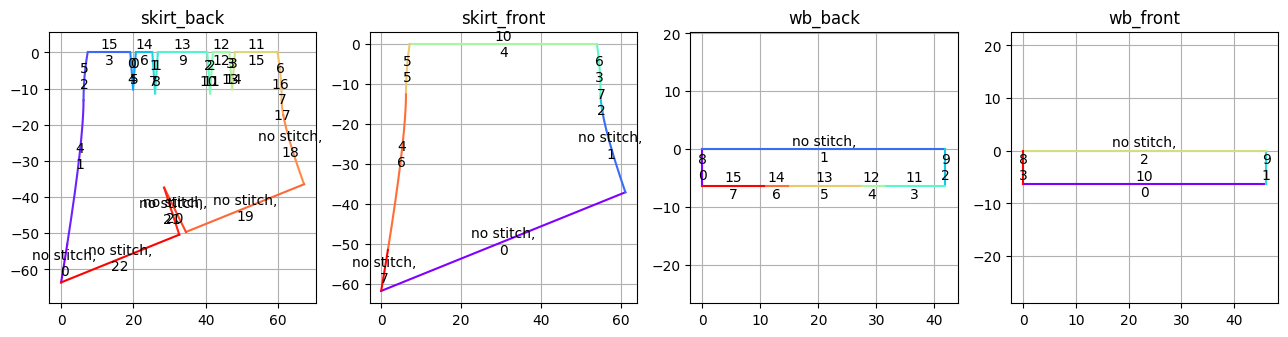

In [139]:
panel_svg_path_dict = {
    panel_name : pattern._draw_a_panel(
        panel_name, apply_transform=False, fill=True
    )
    for panel_name in pattern.panel_order()
}

stitch_dict = {
    i : v for i, v in enumerate(pattern.pattern['stitches'])
}

FIGLEN = 4
NCOLS = int(np.sqrt(len(panel_svg_path_dict)))
NROWS = int(np.ceil(len(panel_svg_path_dict) / NCOLS))
NCOLS = 5
NROWS = 3

plt.figure(figsize=(FIGLEN * NCOLS, FIGLEN * NROWS))
for i, (panel_name, panel) in enumerate(panel_svg_path_dict.items()):
    ax = plt.subplot(NROWS, NCOLS, i+1) # i+1
    ax.set_title(panel_name)
    plot_panel_info(
        ax, panel_name, panel_svg_path_dict, stitch_dict,
        N_SAMPLES=1000
    )
# plt.savefig(f"{garment_id}_panel_vis.png")
plt.show()

In [126]:
# # calculate edge length
# # for i in range(5):
# #     print(calculate_edge_length(panel_svg_path_dict['pant_l_cuff_skirt_f'][0][i]))
# a= [28.25487662672109, 19.737241797019898, 2.9567600129784353, 28.25487662672109, 27.726609351046683]
# total =sum(a)
# ls = []
# for i in a:
#     ls.append(round((i/total), 4))

# # i want to round 4
# sum(ls)

In [140]:
# 1번
#TODO: 각 패널 엣지에 x, y 에 대한 좌표 정보를 얻기 위한 함수
import pandas as pd

def process_path_data(data):
    """
    주어진 Path 데이터를 DataFrame으로 처리.
    - 요소 타입 변환 (QuadraticBezier -> Bezier Curve, Line -> Straight)
    - start, control, control1, control2, end, radius의 실수부/허수부를 x, y로 분리
    - 복소수 열 제거
    
    Args
        data (tuple): Path 객체와 속성 정보가 포함된 데이터
    
    Returns:
        pd.DataFrame: 처리된 데이터프레임
    """
    rows = []
    # Path 내부 요소 순회
    for element in data[0]:
        row = {
            "type": type(element).__name__,  # 요소 타입
            "start": getattr(element, "start", None),
            "controla": getattr(element, "control", None),
            "controlb": getattr(element, "control", None),
            "control1": getattr(element, "control1", None),
            "control2": getattr(element, "control2", None),
            "end": getattr(element, "end", None),
            "radius": getattr(element, "radius", None),
            "rotation": getattr(element, "rotation", None),
            "large_arc": getattr(element, "large_arc", None),
            "sweep": getattr(element, "sweep", None),
        }
        rows.append(row)
    
    # DataFrame 생성
    df = pd.DataFrame(rows)
    
    # type 열의 값을 변경하기 위한 매핑 사전
    type_mapping = {
        "QuadraticBezier": "Bezier Curve",
        "CubicBezier": "Bezier Curve",
        "Line": "Straight",
        "Arc": "Arc", #임의로 바꿈    
    }
    
    # type 열 값 변경
    df["type"] = df["type"].map(type_mapping).fillna(df["type"])
    
    # TODO: 2024.01.16 이후 Arc에 대한 정보에 대해 Bezier Curve로 변환예정.
    # -> 일단 되게 끔 하는게 목표.
    # 대상 열 목록
    coordinate_columns = ["start",  "controla", "controlb", "control1", "control2",  "end"] 
    
    # 실수부와 허수부를 분리하여 새로운 열로 추가하는 함수
    def extract_coordinates(df, columns):
        for col in columns:
            df[f"{col}_x"] = df[col].apply(lambda z: z.real if isinstance(z, complex) else None)
            df[f"{col}_y"] = df[col].apply(lambda z: z.imag if isinstance(z, complex) else None)
        # TODO: x, y 좌표를 상하 반전
        # minimize
        max_y = df[['start_y', 'controla_y', 'controlb_y', 'control1_y', 'control2_y', 'end_y']].max().max()
        min_y = df[['start_y', 'controla_y', 'controlb_y', 'control1_y', 'control2_y', 'end_y']].min().min()
        stand_y = (max_y + min_y)

        for col in columns: 
            df[f"{col}_y"] = (stand_y - df[f"{col}_y"]) * (8.5) #TODO: 01.17 scaling까지 
            df[f"{col}_x"] = df[f"{col}_x"]* (8.5)#TODO: scaling까지 
        df['controlb_x'] = df['controla_x'].round(4) # TODO: ontrolb_x 에 round
        # TODO: 여기까지
        return df
    
    # 실수부와 허수부를 분리하여 데이터프레임에 추가
    df = extract_coordinates(df, coordinate_columns)
    
    # 기존 열 중 복소수 값을 제거
    df = df.drop(columns=coordinate_columns)
    
    return df

In [141]:
# 2번
# 각 panel에 대한 start, end 좌표를 저장해 놓는 함수
import math
from svgpathtools import Path, Line, QuadraticBezier, CubicBezier, Arc
# TODO: 2024.01.19 15:29 name 추가함.
# def calculate_edge_length(edge):
#     """
#     각 엣지의 길이를 계산.
#     """
#     if isinstance(edge, Line):
#         return abs(edge.end - edge.start)
#     elif isinstance(edge, QuadraticBezier):
#         return edge.length()
#     elif isinstance(edge, CubicBezier):
#         return edge.length()
#     elif isinstance(edge, Arc):
#         return edge.length()
#     else:
#         raise ValueError(f"Unsupported edge type: {type(edge)}")

def calculate_edge_length(edge):
    """
    각 엣지의 길이를 계산. QuadraticBezier의 경우 CubicBezier처럼 처리.
    """
    if isinstance(edge, Line):
        return abs(edge.end - edge.start)
    elif isinstance(edge, QuadraticBezier):
        # QuadraticBezier -> CubicBezier 변환
        # 기존 컨트롤 포인트
        control1 = edge.control
        
        # 새로운 컨트롤 포인트 추가
        control2 = complex(round(control1.real, 4), control1.imag)  # x좌표 소수점 4자리로 변경
        # QuadraticBezier -> CubicBezier 변환
        cubic_edge = CubicBezier(
            start=edge.start,
            control1=control1,
            control2=control2,
            end=edge.end
        )
        
        # CubicBezier 길이 계산
        return cubic_edge.length()
    elif isinstance(edge, CubicBezier):
        return edge.length()
    elif isinstance(edge, Arc):
        return edge.length()
    else:
        raise ValueError(f"Unsupported edge type: {type(edge)}")

def calculate_fstart_fend(path, panel_name):
    """
    전체 엣지에 대해 fstart와 fend를 계산.
    """
    total_length = sum(calculate_edge_length(edge) for edge in path)
    fstart = 0.0
    results = []

    for idx, edge in enumerate(path):  # enumerate를 사용하여 번호 부여
        edge_length = calculate_edge_length(edge) # TODO: name 넣어봄 01.19.17:00
        fend = fstart + (edge_length / total_length)
        results.append({
            "edge_id": idx,  # 엣지 번호
            "edge": str(edge),  # Edge를 문자열로 변환하여 저장
            "fstart": round(fstart, 6),
            "fend": round(fend, 6)
        })
        fstart = fend

    return results

# 여러 패널의 정보를 저장할 딕셔너리
panel_fstart_fend_info = {}

# 패널 리스트 (예: pattern.panel_order())
panel_list = pattern.panel_order()

# 각 패널에 대해 fstart, fend 계산
for panel_name in panel_list:
    path = panel_svg_path_dict[panel_name][0]  # 패널에 해당하는 경로 정보 가져오기
    fstart_fend_results = calculate_fstart_fend(path, panel_name) # TODO: 2024.01.19 14:33 panel_name 넣기
    panel_fstart_fend_info[panel_name] = fstart_fend_results  # 결과를 딕셔너리에 저장

# panel_fstart_fend_info에 패널 정보, edge, start, end, edge_id 까지 저장 되어있다.
# 결과 출력 (딕셔너리 형태)
import pprint
pprint.pprint(panel_fstart_fend_info)

{'skirt_back': [{'edge': 'QuadraticBezier(start=63.644877802528626j, '
                         'control=(0.9084250769081504+58.12418048594818j), '
                         'end=(1.6837370363691946+53.13961383992476j))',
                 'edge_id': 0,
                 'fend': 0.032018,
                 'fstart': 0.0},
                {'edge': 'QuadraticBezier(start=(1.6837370363691946+53.13961383992476j), '
                         'control=(6.199508520223504+24.10721772529361j), '
                         'end=(6.199510132300944+13.262681499068464j))',
                 'edge_id': 1,
                 'fend': 0.152964,
                 'fstart': 0.032018},
                {'edge': 'QuadraticBezier(start=(6.199510132300944+13.262681499068464j), '
                         'control=(6.1995102377371945+6.608068141019015j), '
                         'end=(7.344088876294457+0j))',
                 'edge_id': 2,
                 'fend': 0.19312,
                 'fstart': 0.152964},
         

In [142]:
# 3번
### 원래꺼 
# 이게 2024.01.14 12:58 + (15:55 기준 최신본.
# TODO: Pattern List + (InstanceDataList)에 대한 정보를 json으로 넣는 코드.
# ++ Bezier Curve, Straight가 아닌
# Arc , Qudratic Curve, Cubic Curve에 대해서는 어떻게 다룰지. 
# InstanceDataList 생성

# InstanceDataList 추가 루프

import pandas as pd
import json
import math


# 패널 이름에 따라 데이터프레임 처리
def process_negative_columns(panel_names, panel_dataframes):
    # 패널 이름이 '_back', '_b', '_btorso'로 끝나는 경우
    if '_back' in panel_names or '_b' in panel_names or '_btorso' in panel_names or "_b_l" in panel_names or "_b_r" in panel_names:
        print(f"Processing panel: {panel_names}")  # 디버깅 출력
        # 해당 데이터프레임의 '_x'로 끝나는 열 처리
        df = panel_dataframes
        df_columns = df.columns  # 데이터프레임 열 이름 가져오기

        # TODO: 20240123 15:30 그냥 해봄            
        for col in df_columns:
            if col.endswith('_x'):  # '_x'로 끝나는 열 확인
                # df[col] = stand_x - df[col]
                df[col] = df[col] * -1  # 열 값에 음수 곱하기
    else:
        print(f"Skipping panel: {panel_names}")
    return panel_dataframes

# 적용

# 패널 데이터프레임 생성
panel_dataframes = [process_path_data(drawn_pattern) for drawn_pattern in drawn_pattern_list]
panel_names = list(pattern.panel_order())


# Initialize the top-level JSON structure
garment_data = {
    "FabricList": [],
    "GradingRuleTableList": [],
    "PatternList": [],
    "SymmetricDataList": [],
    "InstanceDataList": [],
    "SeamLinePairGroupList": [],
}

# Process each panel
for panel_name, df in zip(panel_names, panel_dataframes):
    # Initialize JSON structure for the panel
    panel_dataframes = process_negative_columns(panel_name, df)
    panel_data = {
        "Name": panel_name,
        "fGrainlineAngle": 0.0,
        "ID": panel_name,
        "strSuperImposeSide": "None",
        "CurrentFabricUUID": "DWX6ey",
        "IsClosed": False,
        "InternalLineList": [],
        "ButtonHeadList": [],
        "ButtonHoleList": [],
        "AnnotationList": [],
        "NotchList": [],
        "IsHalfSymmetric": False,
        "ShapeInfo": {
            "IsSlashed": False,
            "LineList": [],
            "HalfSymmetryPointIDMap": {},
            "HalfSymmetryLineIDMap": {}
        },
        "ArrangementPointDataMap": {
                "PointName": "Body_Front_Center_3",
                "fOffSetX": 0.0,
                "fOffSetY": 0.05,
                "fAngle": 180.0
        }
    }
    # InstanceDataList에 json에 추가
    instance_data = {
        "OriginPatternID": panel_name,  # 패널 이름을 OriginPatternID로 사용
        "InstancePatternIDArray": []   # 빈 리스트로 추가
    }
    garment_data["InstanceDataList"].append(instance_data)
    # 패널별 좌표 ID 초기화
    coordinate_id_map = {}
    point_counter = 0  # 패널 내 좌표 카운터

    # Generate LineList and PointList for the panel
    for edge_idx, row in df.iterrows():
        line_id = f"{panel_name}_edge_{edge_idx}"
        point_list = []
        columns_x = [col for col in row.index if col.endswith('_x')]
        columns_y = [col for col in row.index if col.endswith('_y')]
        
        if row["type"] == "Bezier Curve":
            row_type = ["Straight", "Bezier Curve", "Bezier Curve", "Straight"]
            idx = 0
            for col_x, col_y in zip(columns_x, columns_y):  # Skip 'type' and go by pairs
                x, y = row[col_x], row[col_y]
                if not (pd.isna(x) or pd.isna(y)):#TODO: or math.isclose(x, 0.0) and math.isclose(y, 0.0) ):
                    # 좌표에 대해 새로운 ID 생성 (패널 내에서만)
                    key = (x, y)
                    if key not in coordinate_id_map:
                        coordinate_id_map[key] = f"{panel_name}_point_{point_counter}"
                        point_counter += 1
                    point_id = coordinate_id_map[key]
                    
                    point_list.append({
                        "ID": point_id, 
                        "PointType": row_type[idx],
                        "Position": {"x": x, "y": y},
                        "GradingRuleID": -1
                    })
                    idx +=1 
        # TODO: Arc 타입에 대해 베지어로 변환하여 Json에 넣는 작업.
        elif row["type"] == "Arc":
            arc_bezier = arc_to_bezier(row)
            columns_x = [key for key in row.keys() if key.endswith('_x')]
            columns_y = [key for key in row.keys() if key.endswith('_y')]
            # 사용하지 않을 키 필터링
            excluded_keys = {"controla_x", "controlb_x", "controla_y", "controlb_y"}
            columns_x = [col for col in columns_x if col not in excluded_keys]
            columns_y = [col for col in columns_y if col not in excluded_keys]
            print(columns_x, columns_y)
            
            row_type = ["Straight", "Bezier Curve", "Bezier Curve", "Straight"]
            idx = 0
            for col_x, col_y in zip(columns_x, columns_y):  # Skip 'type' and go by pairs
                print(arc_bezier[col_x], arc_bezier[col_y])
                x, y = arc_bezier[col_x], arc_bezier[col_y]
                if not (pd.isna(x) or pd.isna(y)):#TODO: or math.isclose(x, 0.0) and math.isclose(y, 0.0) ):
                    # 좌표에 대해 새로운 ID 생성 (패널 내에서만)
                    key = (x, y)
                    if key not in coordinate_id_map:
                        coordinate_id_map[key] = f"{panel_name}_point_{point_counter}"
                        point_counter += 1
                    point_id = coordinate_id_map[key]
                    
                    point_list.append({
                        "ID": point_id, 
                        "PointType": row_type[idx],
                        "Position": {"x": x, "y": y},
                        "GradingRuleID": -1
                    })
                    idx +=1          
        elif row["type"] == "Straight":
            # Iterate through columns 2 by 2 for x and y
            for col_x, col_y in zip(columns_x, columns_y):  # Skip 'type' and go by pairs
                x, y = row[col_x], row[col_y]
                if not (pd.isna(x) or pd.isna(y)):#TODO: or math.isclose(x, 0.0) and math.isclose(y, 0.0) ):
                    # 좌표에 대해 새로운 ID 생성 (패널 내에서만)
                    key = (x, y)
                    if key not in coordinate_id_map:
                        coordinate_id_map[key] = f"{panel_name}_point_{point_counter}"
                        point_counter += 1
                    point_id = coordinate_id_map[key]
                    
                    point_list.append({
                        "ID": point_id,
                        "PointType": row["type"],
                        "Position": {"x": x, "y": y},
                        "GradingRuleID": -1
                    })
    

        # Add Line to LineList
        line = {"ID": line_id, "PointList": point_list}
        panel_data["ShapeInfo"]["LineList"].append(line)

    # Add the panel data to the PatternList
    garment_data["PatternList"].append(panel_data)

# # Convert to JSON string with indentation
# json_output = json.dumps(garment_data, indent=4)

# # Save to a file (optional)
# output_file = "multiple_panels_data3.json"
# with open(output_file, "w") as file:
#     file.write(json_output)

# # 결과 출력
# print(json_output)

Processing panel: skirt_back
Skipping panel: skirt_front
Processing panel: wb_back
Skipping panel: wb_front


In [144]:
# 4번
# 2024.01.14 14:33 기준 2:51 기준
# 2024.01.14 TODO: Seam Line Pair Group json으로 넣는 코드
# 2024.01.16 TODO: front , back 에 따라 Pair List의 Direction 결정 넣기
# SeamLinePairGroupList 생성
####TODO: 여기부터 내가 임의로 테스트 해봄 2024.01.19 16:16
file_path = '/media/hjp/db6095ca-a560-4c3a-90ad-b667ec189671/REFERENCES/3D_VTO/GarmentCode/GarmentCode/ANALYSIS_josef/nique_panel_names.csv'
data = pd.read_csv(file_path)

# 열 이름 설정
data.columns = ['name']

# 분류 로직 추가
data['classification'] = data['name'].apply(
    lambda x: 'back' if '_back' in x or '_b' in x or '_btorso' in x else
            'front' if '_front' in x or '_f' in x or '_ftorso' in x else
            'other'
)

# 각 분류에 따른 리스트 생성
front_list = data[data['classification'] == 'front']['name'].tolist()
back_list = data[data['classification'] == 'back']['name'].tolist()
other_list = data[data['classification'] == 'other']['name'].tolist()    
#### TODO: 여기까지    

garment_data["SeamLinePairGroupList"] = []
fabric_group = {
    "FabricName" : "Default Fabric",
    "FabricType" : "None",
    "FabricContent" : "None",
    "strBaseColorHexCode" : "#FFFFFF",
    "FabricUUID" : "DWX6ey"
    }
# SeamLinePairGroupList 생성 루프
for idx, value in enumerate(stitch_dict.values()):
    

    
    # "Name" 생성
    group_name = f"SeamLineGroup_{idx}"

    # value에서 첫 번째와 두 번째 ShapeID 정보 추출
    first_info = value[0]
    second_info = value[1]
        
    # 정보 저장
    first_panel = first_info["panel"] # 패널 정보
    first_edge = first_info["edge"]
    first_shape_id = f"{first_panel}"
    
    second_panel = second_info["panel"]
    second_edge = second_info["edge"]
    second_shape_id = f"{second_panel}" #TODO: 이부분 제외 '_edge_{second_edge}"'
    
    # 첫 번째 fStart와 fEnd 추출
    first_fstart_fend = next(
        (item for item in panel_fstart_fend_info[first_panel] if item["edge_id"] == first_edge),
        None
    )
    # 두 번째 fStart와 fEnd 추출
    second_fstart_fend = next(
        (item for item in panel_fstart_fend_info[second_panel] if item["edge_id"] == second_edge),
        None
    )
    
    # first, second panel 정보 넣음
    if first_fstart_fend is not None:
        first_fstart_fend["panel"] = first_panel
    first_point = first_fstart_fend["edge"]
    
    if second_fstart_fend is not None:
        second_fstart_fend["panel"] = second_panel
    second_point = second_fstart_fend["edge"]
    # TODO 2024.01.19 14:30 direeciton 넣기 

    ### ###끝나는 부분까지 생략.
    #first_start_point, first_end_point = transform_3d_point(first_fstart_fend)
    #second_start_point, second_end_point = transform_3d_point(second_fstart_fend)
    
    #first_vec = first_end_point - first_start_point
    #second_vec = second_end_point - second_start_point
    
    #dot_product = np.dot(first_vec, second_vec)
    
    ###
    
    # if second_panel in _list:
    #     second_direction = True
        

    
    
    # # TODO: 기존에 해놓은 정보 그대로 둬봄 2024.01.20.13:52
    # if first_panel in front_list:
    #     first_direction = transform_3d_point(first_fstart_fend)
    # elif first_panel in back_list:
    #     first_direction = transform_3d_point(first_fstart_fend)
    # else:
    #     first_direction = False
    
    # if second_panel in front_list:
    #     second_direction = transform_3d_point(second_fstart_fend)
    # elif second_panel in back_list:
    #     second_direction = transform_3d_point(second_fstart_fend)
    # else:
    #     second_direction = False


    # TODO: 3차원 점을 통해 패널간의 stitch direction 결정하는 부분
    # 2024.01.23 14:03 시작 !!
    if (first_panel == second_panel) :
        first_direction = True
        second_direction = False
    elif (first_panel in back_list) and (second_panel in back_list):
        first_direction = True
        second_direction = False
    elif (first_panel in front_list) and (second_panel in front_list):
        first_direction = True
        second_direction = False        
    else: 
        pass
    
    
    first_direction = True
    second_direction = False
    
    # direction 결정 뒤에 정해 놓는 fstart, fend
    if first_direction == False:
        first_fstart, first_fend = first_fstart_fend["fend"], first_fstart_fend["fstart"]
    else:
        first_fstart, first_fend = first_fstart_fend["fstart"], first_fstart_fend["fend"]
    
    # direction 결정 뒤에 정해 놓는 fstart, fend        
    if second_direction == False:
        second_fstart, second_fend = second_fstart_fend["fend"], second_fstart_fend["fstart"]
    else:
        second_fstart, second_fend = second_fstart_fend["fstart"], second_fstart_fend["fend"]
    

    # JSON 구조 생성
    seam_line_pair_group = {
        "Name": group_name,
        "bIsTurned": False,
        "PairList": [
            {
                "First": {
                    "ShapeID": first_shape_id,
                    "LengthParam": {
                        "fStart": first_fstart,
                        "fEnd": first_fend
                    },
                    "Direction": first_direction
                },
                "Second": {
                    "ShapeID": second_shape_id,
                    "LengthParam": {
                        "fStart": second_fstart,
                        "fEnd": second_fend
                    },
                    "Direction": second_direction 
                }
            }
        ],
        "FoldData": {
            "iAngle": 180,
            "iStrength": 5
        }
    }

    # SeamLinePairGroupList에 추가
    garment_data["SeamLinePairGroupList"].append(seam_line_pair_group)

garment_data["FabricList"].append(fabric_group)    

# JSON 출력
json_output = json.dumps(garment_data, indent=4)
# Save to file (optional)
output_file = f"Clo_No_arc_dir/Clo_Garment_{garment_id}"
with open(output_file, "w") as file:
    file.write(json_output)

# Print the result
print(json_output)

{
    "FabricList": [
        {
            "FabricName": "Default Fabric",
            "FabricType": "None",
            "FabricContent": "None",
            "strBaseColorHexCode": "#FFFFFF",
            "FabricUUID": "DWX6ey"
        },
        {
            "FabricName": "Default Fabric",
            "FabricType": "None",
            "FabricContent": "None",
            "strBaseColorHexCode": "#FFFFFF",
            "FabricUUID": "DWX6ey"
        }
    ],
    "GradingRuleTableList": [],
    "PatternList": [
        {
            "Name": "skirt_back",
            "fGrainlineAngle": 0.0,
            "ID": "skirt_back",
            "strSuperImposeSide": "None",
            "CurrentFabricUUID": "DWX6ey",
            "IsClosed": false,
            "InternalLineList": [],
            "ButtonHeadList": [],
            "ButtonHoleList": [],
            "AnnotationList": [],
            "NotchList": [],
            "IsHalfSymmetric": false,
            "ShapeInfo": {
                "IsSlashe